## 게임회사 퍼블리셔(Publisher)별 매출표

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [107]:
data = pd.read_csv("../vgsales.csv", encoding="latin1")
data['Publisher'].value_counts()

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Media Entertainment                1
New World Computing                1
Genterprise                        1
Rain Games                         1
UIG Entertainment                  1
Name: count, Length: 578, dtype: int64

In [138]:
top_publisher = data.groupby(by=['Publisher'])['Name'].count().sort_values(ascending=False).head(20)

top_publisher = pd.DataFrame(top_publisher).reset_index()
print(top_publisher)


                                 Publisher  Year
0                          Electronic Arts  1339
1                               Activision   966
2                       Namco Bandai Games   928
3                                  Ubisoft   918
4             Konami Digital Entertainment   823
5                                      THQ   712
6                                 Nintendo   696
7              Sony Computer Entertainment   682
8                                     Sega   632
9                     Take-Two Interactive   412
10                                  Capcom   376
11                                   Atari   347
12                              Tecmo Koei   338
13                             Square Enix   231
14  Warner Bros. Interactive Entertainment   217
15              Disney Interactive Studios   214
16                       Eidos Interactive   196
17                            Midway Games   196
18                               505 Games   192
19                  

In [95]:
top_publisher = data.groupby(by=['Publisher'])['Name'].count().sort_values(ascending=False).iloc[:20].index
top_publisher

Index(['Electronic Arts', 'Activision', 'Namco Bandai Games', 'Ubisoft',
       'Konami Digital Entertainment', 'THQ', 'Nintendo',
       'Sony Computer Entertainment', 'Sega', 'Take-Two Interactive', 'Capcom',
       'Atari', 'Tecmo Koei', 'Square Enix',
       'Warner Bros. Interactive Entertainment', 'Disney Interactive Studios',
       'Unknown', 'Eidos Interactive', 'Midway Games', '505 Games'],
      dtype='object', name='Publisher')

## 퍼블리셔별 게임 출시 개수 TOP 20

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Electronic Arts'),
  Text(1, 0, 'Activision'),
  Text(2, 0, 'Namco Bandai Games'),
  Text(3, 0, 'Ubisoft'),
  Text(4, 0, 'Konami Digital Entertainment'),
  Text(5, 0, 'THQ'),
  Text(6, 0, 'Nintendo'),
  Text(7, 0, 'Sony Computer Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Take-Two Interactive'),
  Text(10, 0, 'Capcom'),
  Text(11, 0, 'Atari'),
  Text(12, 0, 'Tecmo Koei'),
  Text(13, 0, 'Square Enix'),
  Text(14, 0, 'Warner Bros. Interactive Entertainment'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Unknown'),
  Text(17, 0, 'Eidos Interactive'),
  Text(18, 0, 'Midway Games'),
  Text(19, 0, '505 Games')])

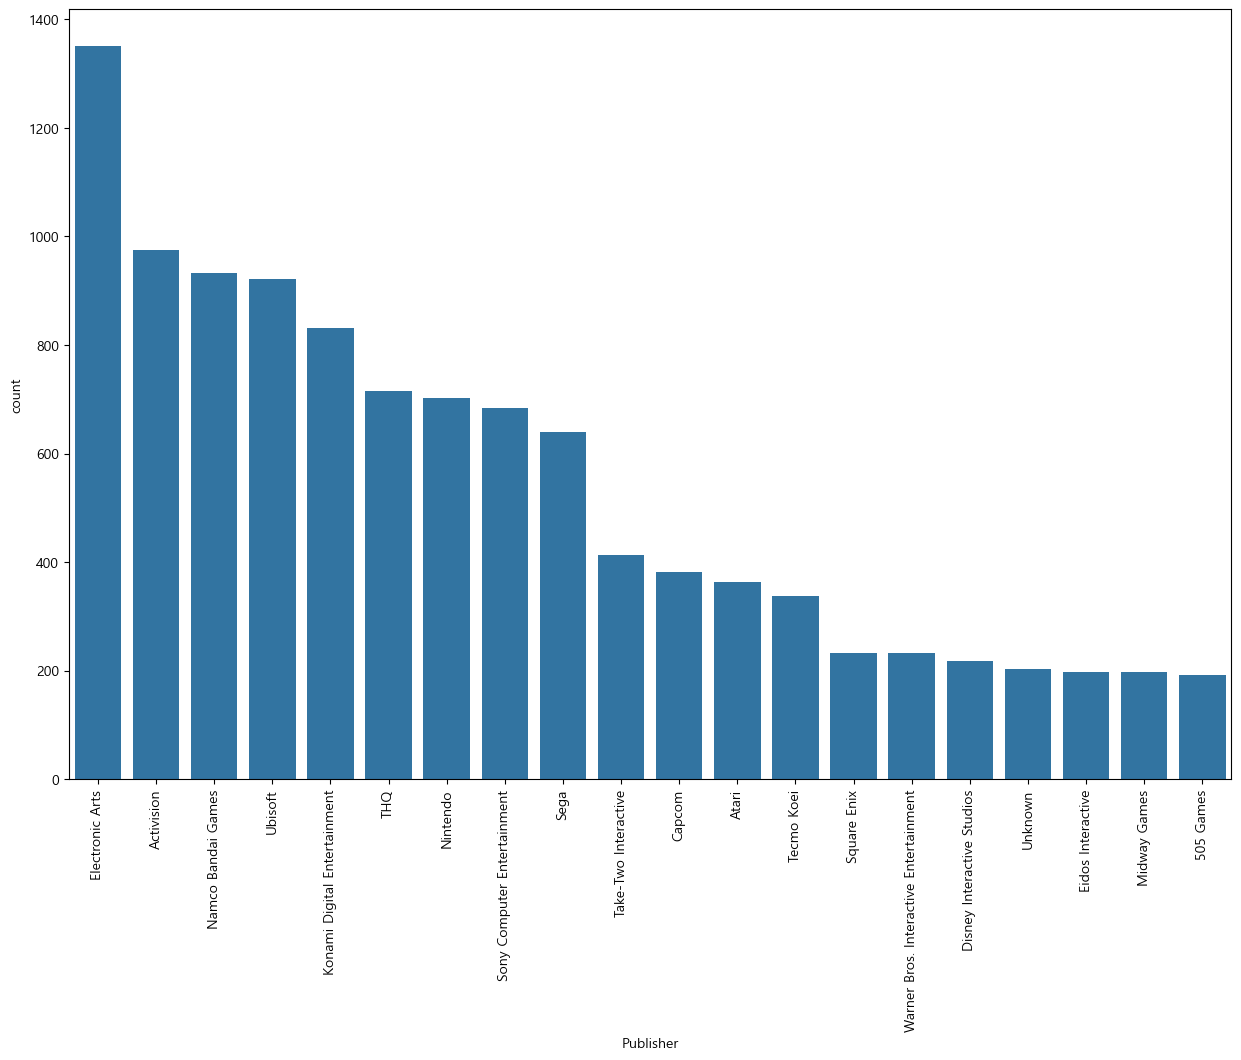

In [96]:
plt.figure(figsize=(15, 10))
sns.countplot(x="Publisher", data=data, order = data.groupby(by=['Publisher'])['Name'].count().sort_values(ascending=False).iloc[:20].index)
plt.xticks(rotation=90)

In [97]:
# NA_Sales,EU_Sales,JP_Sales,Other_Sales
sale_pbl = data[['Publisher', 'Global_Sales']]
sale_pbl = sale_pbl.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(20)
sale_pbl = pd.DataFrame(sale_pbl).reset_index()

## 퍼블리셔별 글로벌 총 매출액 순위 TOP 20

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Nintendo'),
  Text(1, 0, 'Electronic Arts'),
  Text(2, 0, 'Activision'),
  Text(3, 0, 'Sony Computer Entertainment'),
  Text(4, 0, 'Ubisoft'),
  Text(5, 0, 'Take-Two Interactive'),
  Text(6, 0, 'THQ'),
  Text(7, 0, 'Konami Digital Entertainment'),
  Text(8, 0, 'Sega'),
  Text(9, 0, 'Namco Bandai Games'),
  Text(10, 0, 'Microsoft Game Studios'),
  Text(11, 0, 'Capcom'),
  Text(12, 0, 'Atari'),
  Text(13, 0, 'Warner Bros. Interactive Entertainment'),
  Text(14, 0, 'Square Enix'),
  Text(15, 0, 'Disney Interactive Studios'),
  Text(16, 0, 'Eidos Interactive'),
  Text(17, 0, 'LucasArts'),
  Text(18, 0, 'Bethesda Softworks'),
  Text(19, 0, 'Midway Games')])

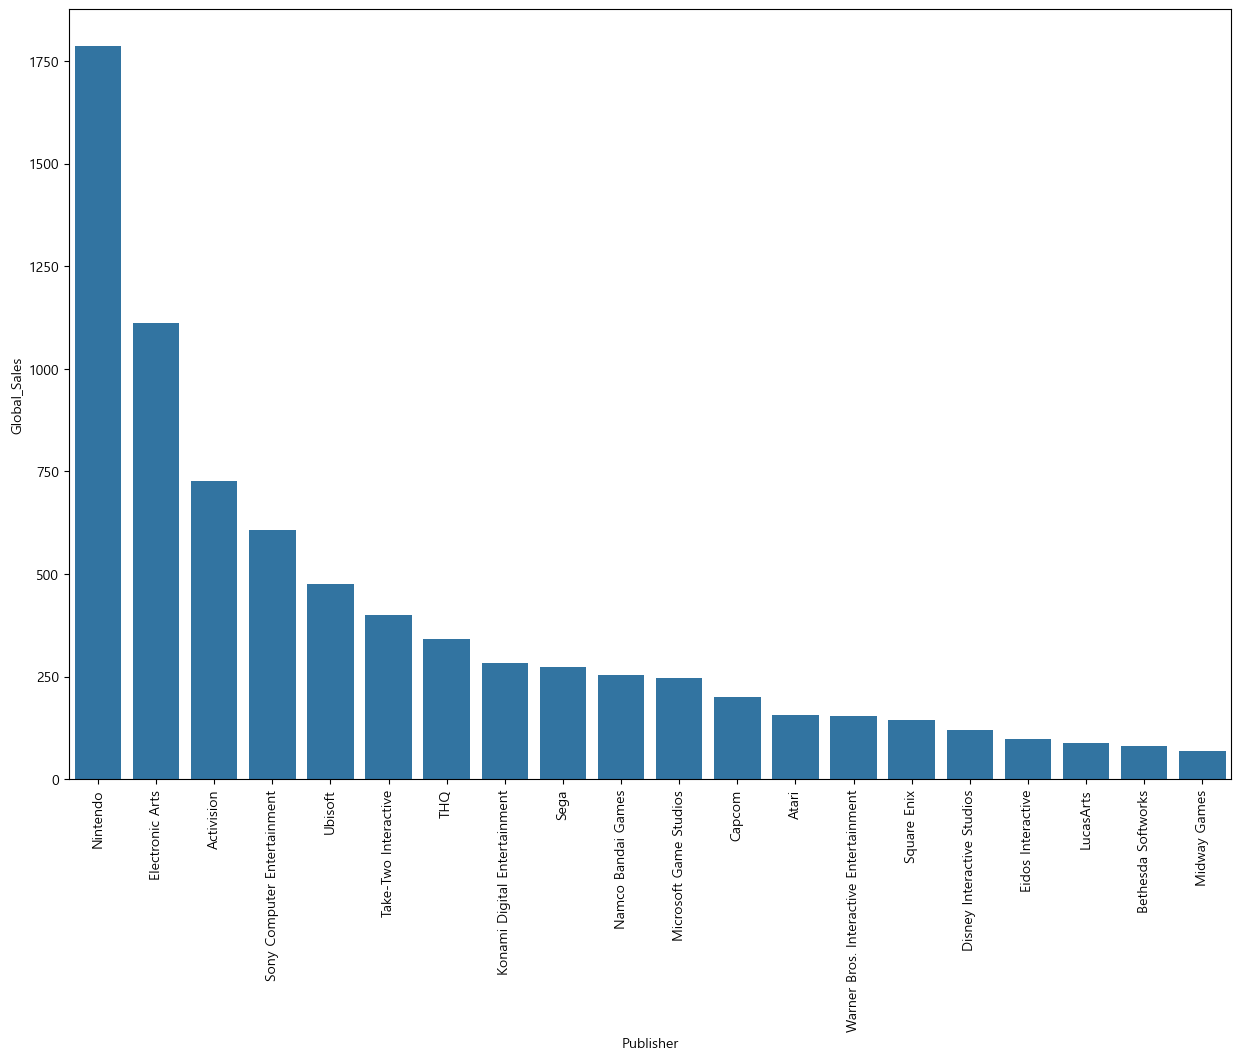

In [98]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Publisher', y='Global_Sales', data=sale_pbl)
plt.xticks(rotation=90)

In [99]:
comp_publisher = data[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
comp_publisher.head()

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Nintendo,11.27,8.89,10.22,1.00,31.37


In [100]:
comp_publisher = comp_publisher.groupby(by=['Publisher']).sum().reset_index().sort_values(by=['Global_Sales'], ascending=False)
comp_publisher = comp_publisher.head(20)
comp_publisher

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
359,Nintendo,816.87,418.74,455.42,95.33,1786.56
138,Electronic Arts,595.07,371.27,14.04,129.77,1110.32
21,Activision,429.70,215.53,6.54,75.34,727.46
456,Sony Computer Entertainment,265.22,187.72,74.10,80.45,607.50
525,Ubisoft,253.43,163.32,7.50,50.26,474.72
494,Take-Two Interactive,220.49,118.14,5.83,55.24,399.54
488,THQ,208.77,94.73,5.01,32.14,340.77
275,Konami Digital Entertainment,92.16,69.69,91.30,30.31,283.64
446,Sega,109.40,82.00,57.03,24.52,272.99
347,Namco Bandai Games,69.52,42.63,127.07,14.69,254.09


In [101]:
comp_publisher = pd.melt(comp_publisher, id_vars=['Publisher'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_publisher

,Publisher,Sale_Area,Sale_Price
0,Nintendo,NA_Sales,816.87
1,Electronic Arts,NA_Sales,595.07
2,Activision,NA_Sales,429.70
3,Sony Computer Entertainment,NA_Sales,265.22
4,Ubisoft,NA_Sales,253.43
...,...,...,...
75,Disney Interactive Studios,Other_Sales,13.18
76,Eidos Interactive,Other_Sales,8.02
77,LucasArts,Other_Sales,10.50
78,Bethesda Softworks,Other_Sales,10.16


## 퍼블리셔별 지역별 매출 순위 TOP 20

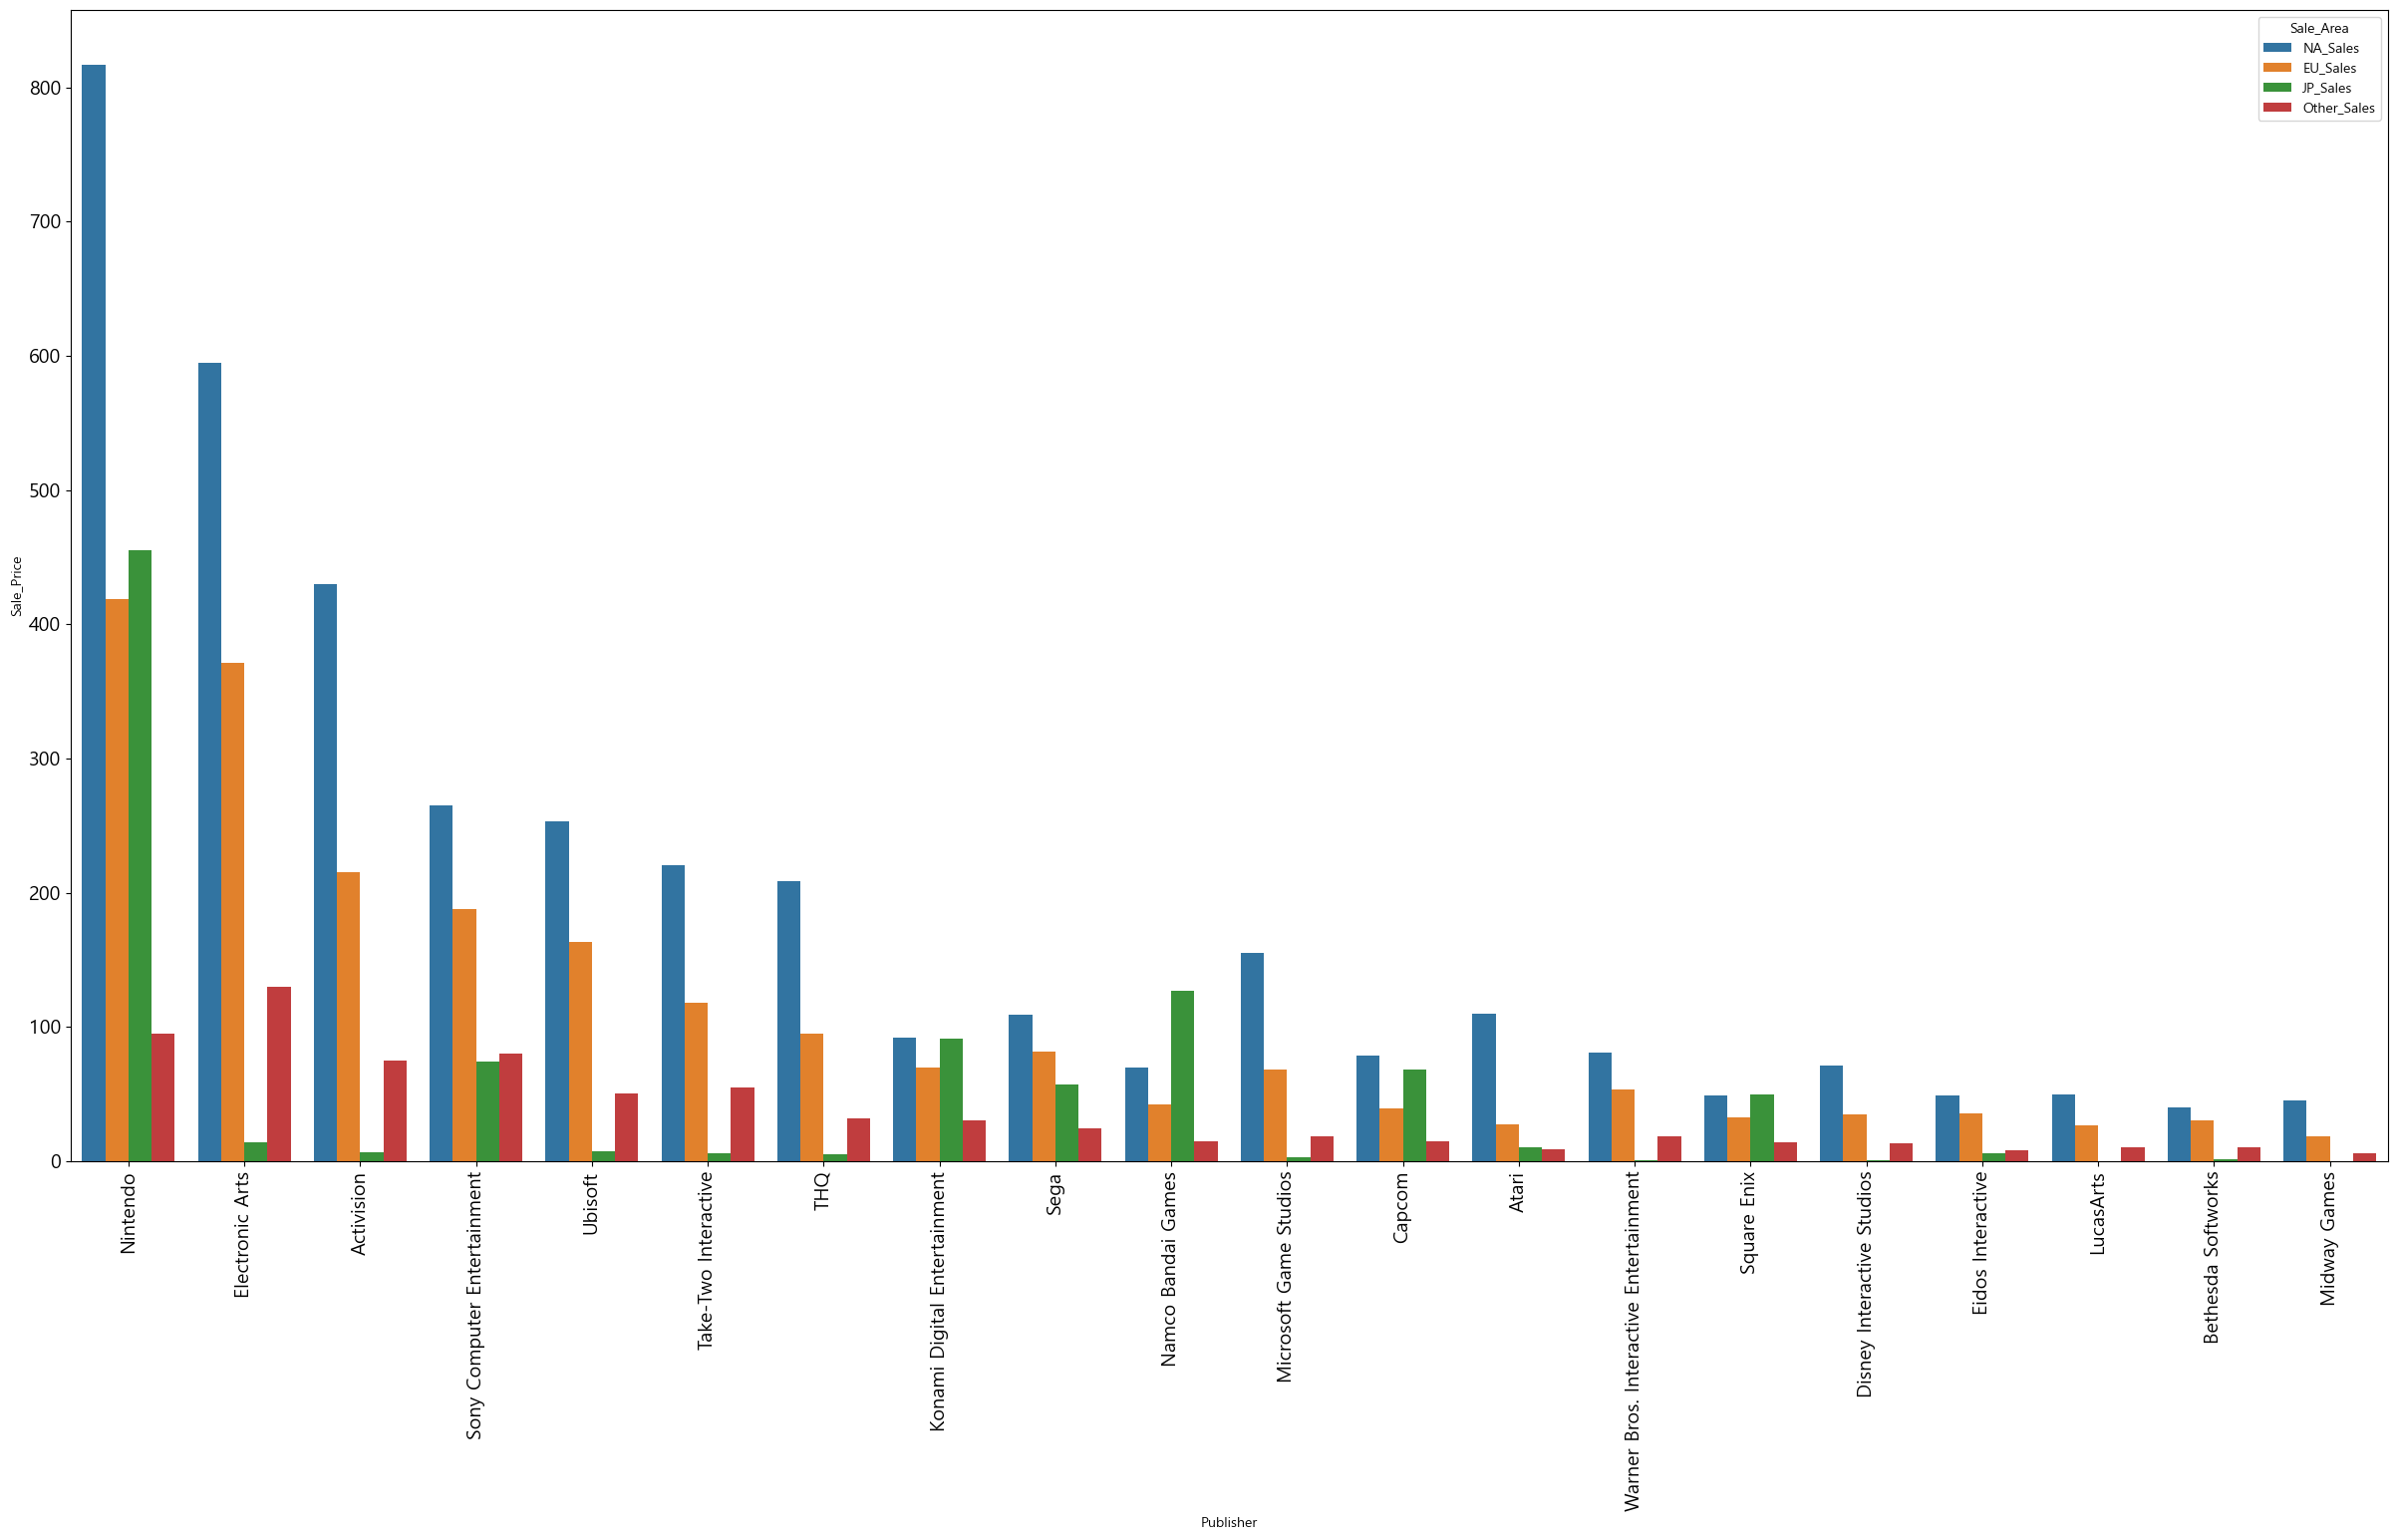

In [102]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Publisher', y='Sale_Price', hue='Sale_Area', data=comp_publisher)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

In [139]:
data_pair = data.loc[:,["Publisher", "NA_Sales","EU_Sales", "Other_Sales","JP_Sales", "Global_Sales"]]
unique_data_pair = data_pair.drop_duplicates(subset=["Publisher"]).head(20)
unique_data_pair

,Publisher,NA_Sales,EU_Sales,Other_Sales,JP_Sales,Global_Sales
0,Nintendo,41.49,29.02,8.46,3.77,82.74
15,Microsoft Game Studios,14.97,4.94,1.67,0.24,21.82
16,Take-Two Interactive,7.01,9.27,4.14,0.97,21.40
28,Sony Computer Entertainment,6.85,5.09,1.16,1.87,14.98
29,Activision,9.03,4.28,1.32,0.13,14.76
60,Ubisoft,6.05,3.15,1.07,0.00,10.26
75,Bethesda Softworks,5.03,2.86,0.85,0.10,8.84
77,Electronic Arts,1.11,6.06,1.26,0.06,8.49
85,Sega,2.58,3.90,0.91,0.66,8.06
87,SquareSoft,2.28,1.72,0.23,3.63,7.86


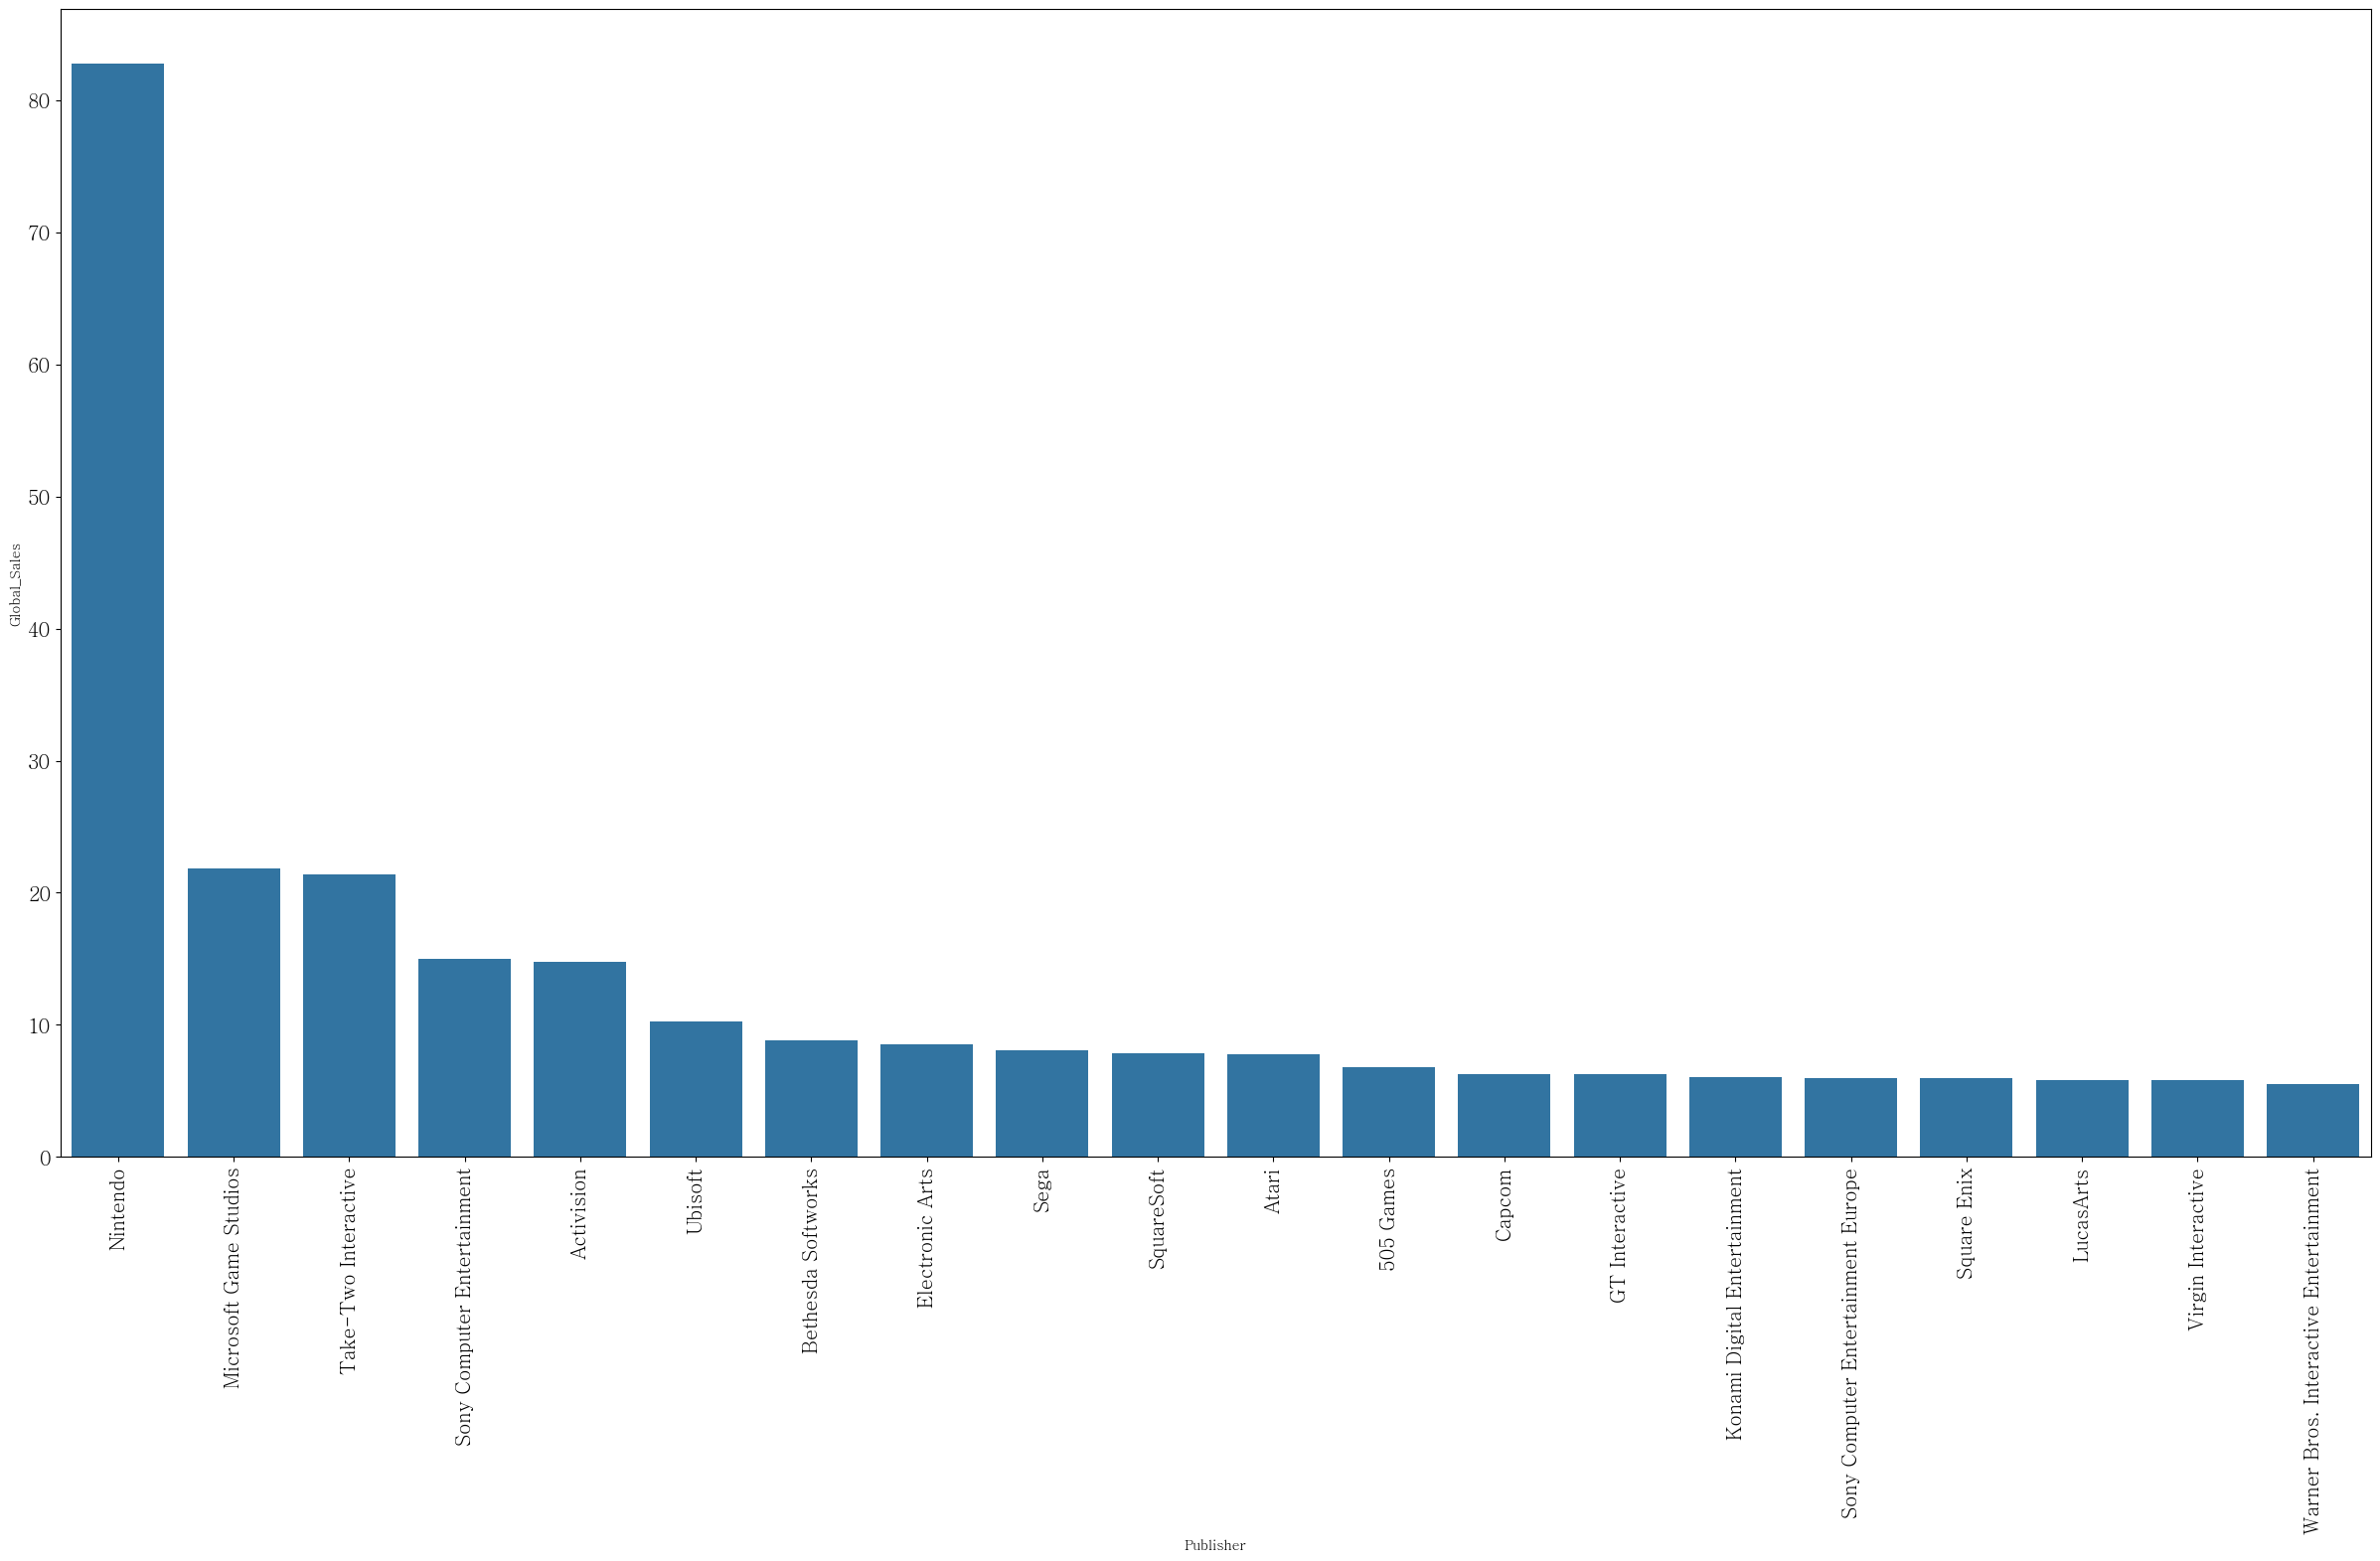

In [140]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Publisher', y='Global_Sales', data=unique_data_pair)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.show()

<Axes: >

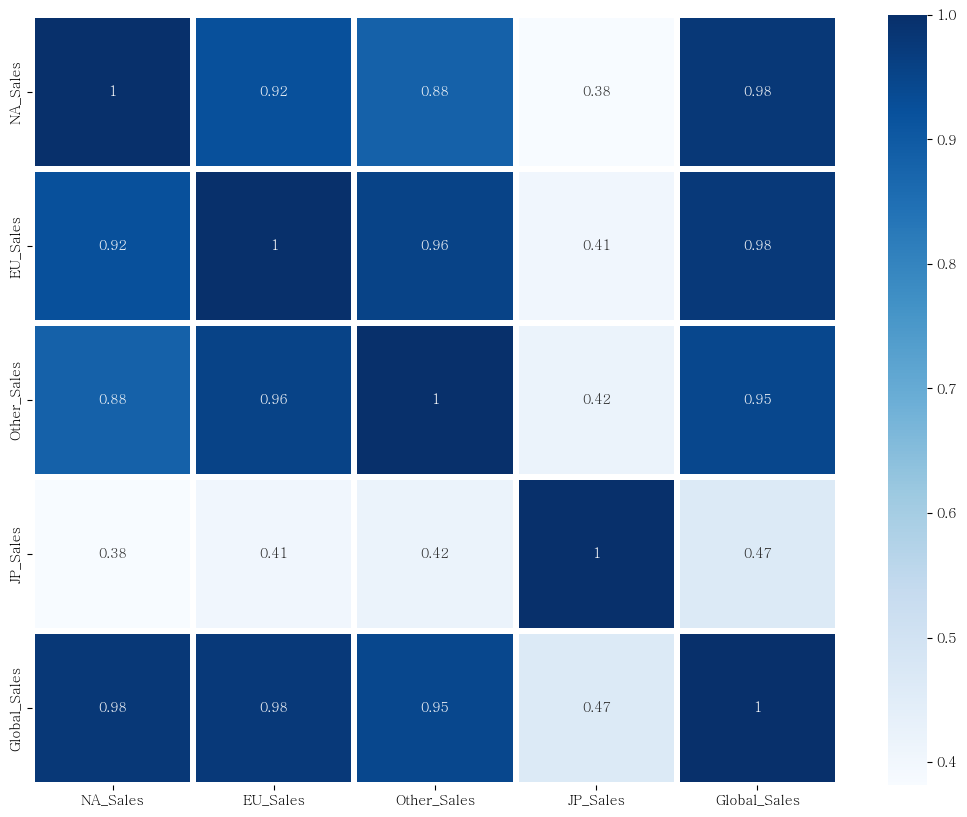

In [141]:
numeric_data = unique_data_pair.select_dtypes(include=['number'])
plt.figure(figsize=(13,10))
plt.rc('font', family='Batang')
sns.heatmap(numeric_data.corr(), cmap = "Blues", annot=True, linewidth=3)